In [30]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import numpy as np
import crc
import matplotlib.pyplot as plt

In [7]:
scenario, n, mode, component = 'NS', 0, '2,2', 'A'

In [8]:
waveforms = crc.add_A_phi(crc.load_waveforms(scenario, n, mode)) # indexed by number, with nested parameters
full, A, phi = crc.reformat(waveforms) # indexed by parameter : q in this case

In [9]:
time = np.linspace(-5000, 250, 5251)
tolerance = 1e-8

tolerance met: 11/1000 vectors in reduced basis                     
orth: 10^(-16.256)
norm: 10^(-15.654)


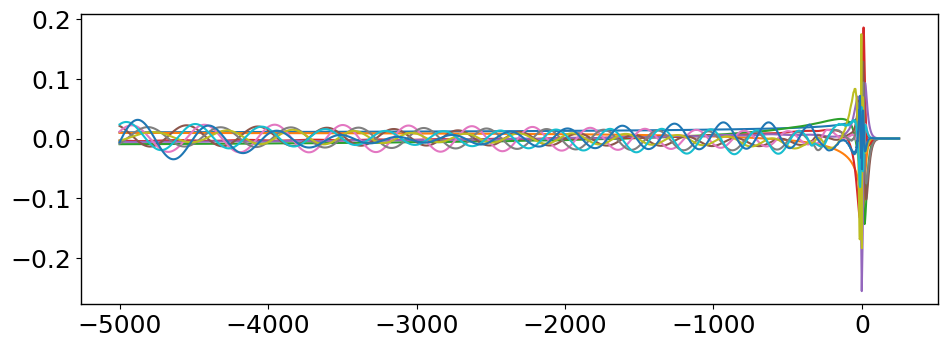

In [40]:
rbA22, sigmasA22, indexesA22 = crc.RB(A, time, 1e-8)
crc.plot_rb(rbA22, time)

tolerance met: 37/1000 vectors in reduced basis                     
orth: 10^(-16.080)
norm: 10^(-15.477)


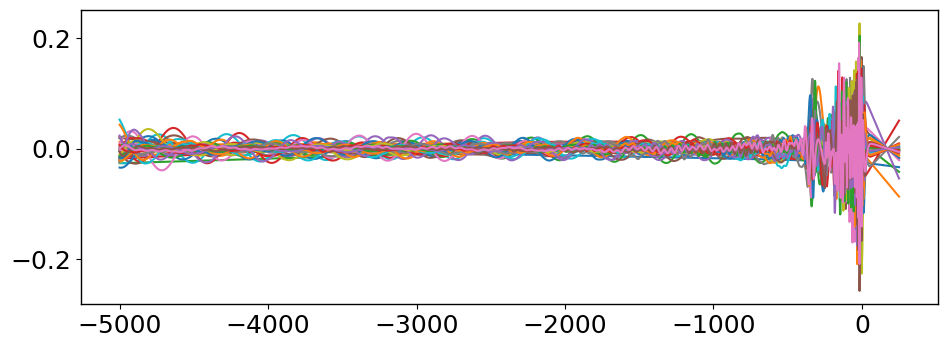

In [41]:
rbphi22, sigmasphi22, indexesphi22 = crc.RB(phi, time, 1e-8)
crc.plot_rb(rbphi22, time)

In [42]:
fullA, fullphi = crc.matrix_basis(A), crc.matrix_basis(phi)
rbA, rbphi = crc.matrix_basis(rbA22), crc.matrix_basis(rbphi22)
M, m, L = np.shape(fullA)[0], np.shape(rbA)[0], np.shape(rbA)[1]

B matrix complete                    


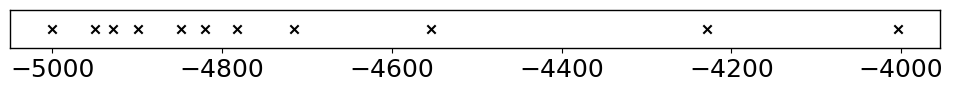

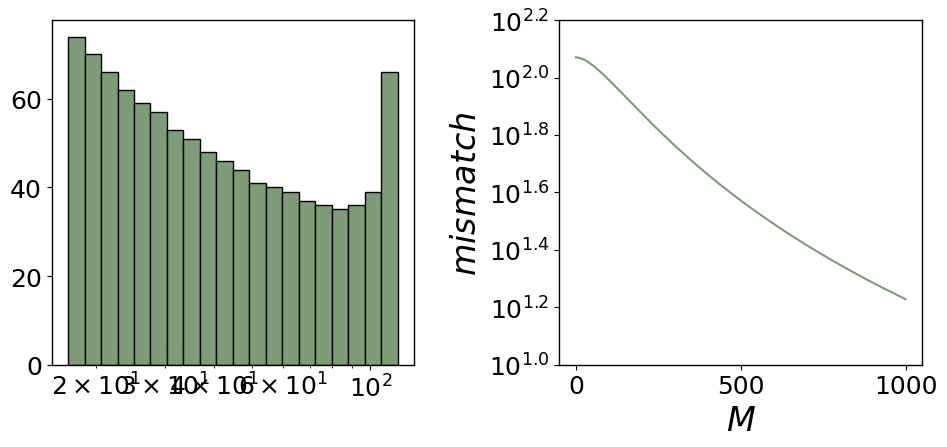

worst mismatch: 10^(2.0701507801706307)


In [43]:
indexes_A, B_A = crc.EI(rbA22, time)
crc.check_nodes(crc.GET_TIME()[indexesA22])
crc.test_EI_new(fullA, B_A, indexes_A, crc.GET_TIME())

B matrix complete                    


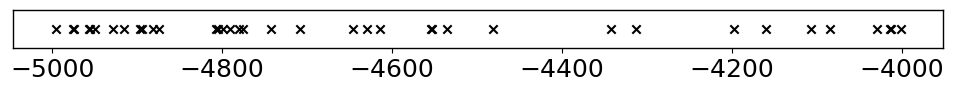

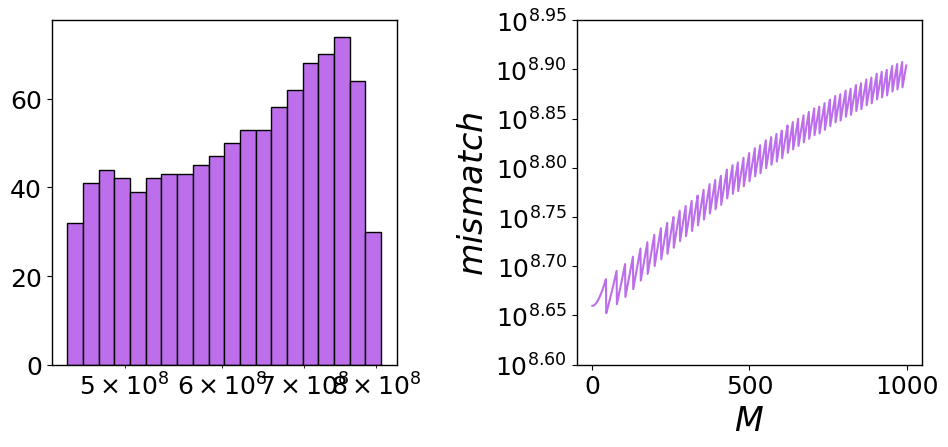

worst mismatch: 10^(8.907420688788033)


In [44]:
indexes_phi, B_phi = crc.EI(rbphi22, time)
crc.check_nodes(crc.GET_TIME()[indexesphi22])
crc.test_EI_new(fullphi, B_phi, indexes_phi, crc.GET_TIME())

In [75]:
# crc.save_I(indexes_A, B_A, B_A_log, 'A', 1)
# crc.save_I(indexes_phi, B_phi, B_phi_log, 'phi', 1)

In [53]:
# greedy_EI_errors_A = crc.greedy_EI_errors(fullA, B_A_log, indexes_A, time)

In [54]:
# greedy_EI_errors_phi = crc.greedy_EI_errors(fullphi, B_phi_log, indexes_phi, time)

In [55]:
# fig = crc.plot_greedy_both(sigmasA22, greedy_EI_errors_A, tolerance, 'A', False)

In [56]:
# fig = crc.plot_greedy_both(sigmasphi22, greedy_EI_errors_phi, tolerance, 'phi', False)

In [57]:
# crc.test_EI_new(fullA, B_A, indexes_A)

In [58]:
# crc.test_EI_new(fullphi, B_phi, indexes_phi)

In [59]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
waveforms_test = crc.add_A_phi(crc.load_waveforms(scenario, n, mode))
full_test, A_test, phi_test = crc.reformat(waveforms_test)

In [62]:
full_test, fullA_test, fullphi_test = crc.matrix_basis(full_test), crc.matrix_basis(A_test), crc.matrix_basis(phi_test)
M_test, L_test = np.shape(fullA_test)[0], np.shape(fullA_test)[1]

In [ ]:
crc.test_EI_new(fullA_test, B_A, indexes_A)

In [ ]:
crc.test_EI_new(fullphi_test, B_phi, indexes_phi)

In [ ]:
# random_ind = crc.randomval(list(range(1000)))
random_ind = 312 # from largest mismatch
random_wf_A, random_wf_phi = fullA_test[random_ind], fullphi_test[random_ind]
random_reconstructed_A, random_reconstructed_phi = crc.EI_h(fullA_test[random_ind], B_A, indexes_A), crc.EI_h(fullphi_test[random_ind], B_phi, indexes_phi)
param_A, param_phi = list(A_test['2,2'].keys())[random_ind], list(phi_test['2,2'].keys())[random_ind]
if param_A != param_phi:
    print('PARAM MISMATCH !')
print(param_A)
mismatch_A, mismatch_phi = crc.mismatch(random_wf_A, random_reconstructed_A), crc.mismatch(random_wf_phi, random_reconstructed_phi)

In [ ]:
random_wf_full = full_test[random_ind]
random_reconstructed_full = random_reconstructed_A * np.exp(1j * random_reconstructed_phi)
mismatch_full = crc.mismatch(full_test[random_ind], random_reconstructed_full)

In [ ]:
mismatches = []
for i in range(M_test):
    frt = crc.EI_h(fullA_test[i], B_A, indexes_A) * np.exp(1j * crc.EI_h(fullphi_test[i], B_phi, indexes_phi))
    ft = full_test[i]
    mismatches.append(crc.mismatch(frt, ft))

print(f'worst mismatch is 10^({np.log10(np.max(mismatches))})')

In [ ]:
# print(np.argmax(mismatches))

In [ ]:
filepath = '../figs/prelim/'

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(time, random_reconstructed_A, linestyle='dashed', zorder=2, label=f'amplitude reconstuction: q = {param_A:.4f}')
ax.plot(time, fullA_test[random_ind], zorder=1, label=f'fiducial waveform')
ax.scatter(nodes_A, fullA_test[random_ind, indexes_A], marker='x', color='k', zorder=3, label=f'empirical nodes')
ax.set_ylabel(r'$A(t/M)$')
ax.set_xlabel(r'$t/M$')
ax.legend()
plt.tight_layout()

# plt.savefig(f'{filepath}A')
fig.tight_layout()
plt.show()
print(f'mismatch = {mismatch_A}')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(time, random_reconstructed_phi, linestyle='dashed', zorder=2, label=f'phase reconstuction: q = {param_A:.4f}')
ax.plot(time, fullphi_test[random_ind], zorder=1, label=f'fiducial waveform')
ax.scatter(nodes_phi, fullphi_test[random_ind, indexes_phi], marker='x', color='k', zorder=3, label=f'empirical nodes')
ax.set_ylabel(r'$\phi(t/M)$')
ax.set_xlabel(r'$t/M$')
ax.legend()
plt.tight_layout()

# plt.savefig(f'{filepath}phi')
fig.tight_layout()
plt.show()
print(f'mismatch = {mismatch_phi}')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(time, random_reconstructed_full, linestyle='dashed', zorder=2, label=f'full reconstuction: q = {param_A:.4f}')
ax.plot(time, random_wf_full, zorder=1, label=f'fiducial waveform')
ax.set_ylabel(r'$h(t/M)$')
ax.set_xlabel(r'$t/M$')
plt.tight_layout()
ax.legend()

# plt.savefig(f'{filepath}full')
fig.tight_layout()
plt.show()
print(f'mismatch = {mismatch_full}')